# 1 Housekeeping

### 1.1 Load libraries

In [0]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#machine learning
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from sklearn.cluster import KMeans 
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
import random

import operator
from functools import reduce
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

### 1.2 Load data

In [0]:
#import raw data
old_train = pd.read_csv('/dbfs/FileStore/wids/train.csv')
old_test = pd.read_csv('/dbfs/FileStore/wids/test.csv')

In [0]:
#load dataset 2
df = pd.read_csv('/dbfs/FileStore/wids/features_data_0102_imputed_star_rating_and_generous_building_id.csv')
df['year_built'] = df['year_built'].astype('int')
df.head(2)

Out[4]:

,Unnamed: 0,id,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,max_wind_speed,days_with_fog,site_eui,building_id,energy_star_rating,peak_NE,peak_SE,peak_SW,peak_NW,max_NE,max_SE,max_SW,max_NW,facility_group,year_built,floor_area_binned,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type,mean_energy_rating_building_id,number_january,number_february,number_march,number_april,number_may,number_june,number_july,number_august,number_september,number_october,number_november,number_december,total_number,number_winter,number_spring,number_summer,number_autumn,eui_improved,eui_diff,hdd_extreme,hdd_extreme_2,avg_total_number_building,year_built_bin,yearB_E_int,calculated_eui,calc_eui_perc_off,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,cluster,weather_cluster,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75
0,0,0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,0.0,248.682615,313,11.0,1,0,0,0,1,0,0,0,food_sales_service,1942,1,3,3,2,29.0,1566.55555,1418.66785,1668.93785,1667.724,1768.23175,1821.4695,1948.21145,1931.46055,1943.82435,1954.89605,1616.5197,1530.4737,20836.9723,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22078.118536,2,3,231.720532,-0.068208,10,10,0.856815,3,1.0,8,245.522877,241.135162,0,0
1,1,1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,12.0,26.500150,201,45.0,0,0,0,0,1,0,0,0,distribution_shipping,1955,4,1,1,2,40.6,1566.55555,1418.66785,1668.93785,1667.724,1768.23175,1821.4695,1948.21145,1931.46055,1943.82435,1954.89605,1616.5197,1530.4737,20836.9723,4654.16125,5257.42525,5823.49635,5101.88945,-1,0.0,346.734908,596.734908,22078.118536,3,2,26.057054,-0.016720,1,1,-0.209475,2,2.0,4,27.609132,39.559542,0,0


In [0]:
#split into (new) train and test set based on id
df_train = df[df["id"].isin(old_train["id"])]
df_test = df[df["id"].isin(old_test["id"])]

In [0]:
# Create the correlation matrix
#corr_mean = temp.corr(method = 'pearson')

#create a mask for the upper triangle
#mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
#fig, ax = plt.subplots(figsize=(10,8)) 
#ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f" , annot_kws={"size": 9})
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
#plt.show()

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3253243718953550> in <module> 
 1 # Create the correlation matrix 
 ----> 2 corr_mean = temp . corr ( method = 'pearson' ) 
 3 
 4 #create a mask for the upper triangle 
 5 mask = np . triu ( np . ones_like ( corr_mean , dtype = bool ) ) 

 NameError : name 'temp' is not defined

# 1 Top features

In [0]:
encoded_train  = df_train.copy()
encoded_test  = df_test.copy()

# Encode Categorical Columns 
cat_cols = ['state_factor', 'building_class', 'facility_type', 'facility_group']
for col in cat_cols:
  le = LabelEncoder()
  encoded_train[col] = le.fit_transform(encoded_train[col])
  encoded_test[col] = le.transform(df_test[col])

In [0]:
X = encoded_train.drop(['id', 'site_eui'],axis=1)
y = encoded_train['site_eui']

from sklearn.feature_selection import chi2, f_regression, SelectKBest

select = SelectKBest(score_func=f_regression, k=50)
z = select.fit_transform(X, y) 

filter = select.get_support()
features = encoded_train.drop(['id', 'site_eui'],axis=1).columns

#40 top features
features[filter]


/databricks/python/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
 correlation_coefficient /= X_norms
Out[10]: Index(['state_factor', 'january_min_temp', 'january_avg_temp',
 'february_min_temp', 'february_avg_temp', 'february_max_temp',
 'march_min_temp', 'march_avg_temp', 'april_min_temp', 'april_avg_temp',
 'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_avg_temp',
 'september_avg_temp', 'november_min_temp', 'cooling_degree_days',
 'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
 'snowdepth_inches', 'days_below_30F', 'days_below_20F',
 'energy_star_rating', 'energy_intensity_floor_area',
 'energy_intensity_built_year', 'energy_intensity_facility_type',
 'mean_energy_rating_building_id', 'number_january', 'number_february',
 'number_march', 'number_april', 'number_june', 'number_july',
 'number_august', 'number_september', 'number_winter', 'number_summer',
 'hdd_extreme', 'hdd_extreme_2', 'yearB_E_int', 'calculated_eui',
 'binned_calc_eui', 'binned_calc_eui_20',
 'verschil_uitstoot_per_temp_tov_jaar_state', 'StateYear_E_Int',
 'building_id_mean', 'fac_type_mean', 'energy_star_above_90',
 'energy_star_above_75'],
 dtype='object')

**Strong features**
* building_id_mean - done
* calculated_eui
* calculated_eui 
* energy_intenstiy_floor_area
* verschil_uitstoot_per_temp_tov_jaar_state

In [0]:
#top 50 features + pet features
train_short = encoded_train[['state_factor', 'january_min_temp', 'january_avg_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'april_min_temp', 'april_avg_temp', 'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_avg_temp', 'september_avg_temp', 'november_min_temp', 'cooling_degree_days',  'heating_degree_days', 'precipitation_inches', 'snowfall_inches',  'snowdepth_inches', 'days_below_30F', 'days_below_20F', 'energy_star_rating', 'energy_intensity_floor_area', 'energy_intensity_built_year', 'energy_intensity_facility_type',   'mean_energy_rating_building_id', 'number_january', 'number_february','number_march', 'number_april', 'number_june', 'number_july',  'number_august', 'number_september', 'number_winter', 'number_summer','hdd_extreme', 'hdd_extreme_2', 'yearB_E_int', 'calculated_eui', 'binned_calc_eui', 'binned_calc_eui_20',   'verschil_uitstoot_per_temp_tov_jaar_state', 'StateYear_E_Int', 'building_id_mean', 'fac_type_mean', 'energy_star_above_90','energy_star_above_75', 'building_id', 'facility_type', 'year_factor', 'year_built', 'floor_area', 'weather_cluster', 'building_class', 'site_eui']]

train_short.head()

Out[11]:

,state_factor,january_min_temp,january_avg_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,april_min_temp,april_avg_temp,june_avg_temp,july_min_temp,july_avg_temp,august_avg_temp,september_avg_temp,november_min_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,days_below_30F,days_below_20F,energy_star_rating,energy_intensity_floor_area,energy_intensity_built_year,energy_intensity_facility_type,mean_energy_rating_building_id,number_january,number_february,number_march,number_april,number_june,number_july,number_august,number_september,number_winter,number_summer,hdd_extreme,hdd_extreme_2,yearB_E_int,calculated_eui,binned_calc_eui,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75,building_id,facility_type,year_factor,year_built,floor_area,weather_cluster,building_class,site_eui
0,0,36,50.5,35,50.589286,73,40,53.693548,41,55.5,60.5,52,62.725806,62.16129,64.65,43,115,2960,16.59,0.0,0,0,0,11.0,3,3,2,29.0,1566.55555,1418.66785,1668.93785,1667.724,1821.4695,1948.21145,1931.46055,1943.82435,4654.16125,5823.49635,346.734908,596.734908,3,231.720532,10,10,0.856815,3,245.522877,241.135162,0,0,313,13,1,1942,61242.0,8,0,248.682615
1,0,36,50.5,35,50.589286,73,40,53.693548,41,55.5,60.5,52,62.725806,62.16129,64.65,43,115,2960,16.59,0.0,0,0,0,45.0,1,1,2,40.6,1566.55555,1418.66785,1668.93785,1667.724,1821.4695,1948.21145,1931.46055,1943.82435,4654.16125,5823.49635,346.734908,596.734908,2,26.057054,1,1,-0.209475,2,27.609132,39.559542,0,0,201,55,1,1955,274000.0,4,0,26.500150
2,0,36,50.5,35,50.589286,73,40,53.693548,41,55.5,60.5,52,62.725806,62.16129,64.65,43,115,2960,16.59,0.0,0,0,0,97.0,1,1,2,97.8,1566.55555,1418.66785,1668.93785,1667.724,1821.4695,1948.21145,1931.46055,1943.82435,4654.16125,5823.49635,346.734908,596.734908,2,22.171559,1,1,-0.218145,2,23.481589,100.965937,1,1,463,48,1,1951,280025.0,4,0,24.693619
3,0,36,50.5,35,50.589286,73,40,53.693548,41,55.5,60.5,52,62.725806,62.16129,64.65,43,115,2960,16.59,0.0,0,0,0,46.0,2,2,1,49.1,1566.55555,1418.66785,1668.93785,1667.724,1821.4695,1948.21145,1931.46055,1943.82435,4654.16125,5823.49635,346.734908,596.734908,2,40.891278,2,2,-0.104341,2,43.272466,69.441531,0,0,303,6,1,1980,55325.0,4,0,48.406926
4,0,36,50.5,35,50.589286,73,40,53.693548,41,55.5,60.5,52,62.725806,62.16129,64.65,43,115,2960,16.59,0.0,0,0,0,100.0,1,1,1,100.0,1566.55555,1418.66785,1668.93785,1667.724,1821.4695,1948.21145,1931.46055,1943.82435,4654.16125,5823.49635,346.734908,596.734908,2,4.897449,1,1,-0.317939,2,5.196438,38.209399,1,1,445,56,1,1985,66000.0,8,0,3.899395


In [0]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

### 1.1 Building id mean

In [0]:
set1 = train_short.copy()
set1 = set1.drop([ 'calculated_eui',
                  'verschil_uitstoot_per_temp_tov_jaar_state',
                  'energy_intensity_floor_area',
                  'energy_intensity_built_year']
                 , axis=1)

In [0]:
# Create the correlation matrix
corr_mean = set1.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
#fig, ax = plt.subplots(figsize=(30,30)) 
#ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f" , annot_kws={"size": 9})
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
#plt.show()

In [0]:
#janarary_min_temp en july_avg_temp behouden
set1= set1.drop([ 'state_factor'], axis=1)

In [0]:
vif_1 =calc_vif(set1)
features_1 = vif_1.sort_values('VIF', ascending = False)
features_1

Out[197]:

,variables,VIF
0,cooling_degree_days,15.004590
3,energy_star_rating,14.103084
4,binned_calc_eui_20,13.420523
6,fac_type_mean,12.346006
11,year_factor,9.991552
1,snowfall_inches,9.248180
5,building_id_mean,7.792395
10,facility_type,5.861532
2,days_below_20F,4.769289
8,energy_star_above_75,3.850512


In [0]:
encoded_test1 = encoded_test.copy()

#set X_train
X = encoded_train[['cooling_degree_days', 'energy_star_rating', 'binned_calc_eui_20', 'fac_type_mean', 'year_factor', 'snowfall_inches', 'building_id_mean',
                       'facility_type', 'days_below_20F', 'energy_star_above_75', 'building_id', 'weather_cluster', 'floor_area']]

#set X_test
encoded_test1 = encoded_test[['cooling_degree_days', 'energy_star_rating', 'binned_calc_eui_20', 'fac_type_mean', 'year_factor', 'snowfall_inches', 'building_id_mean',
                       'facility_type', 'days_below_20F', 'energy_star_above_75', 'building_id', 'weather_cluster', 'floor_area']]
#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test1)

#create df
encoded_test1['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test1['id'] = encoded_test1['id'] =id_list
encoded_test1= encoded_test1[['id', 'site_eui']]
encoded_test1.head()

<command-3253243718953578>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test1['site_eui'] = predictions
<command-3253243718953578>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test1['id'] = encoded_test1['id'] =id_list
Out[223]:

,id,site_eui
75757,75757,155.612059
75758,75758,278.608569
75759,75759,151.691621
75760,75760,267.518201
75761,75761,246.652005


In [0]:
#safe as spark df - 1a 
spark_df = spark.createDataFrame(encoded_test1)
spark_df.display()

id,site_eui
75757,155.61205907610017
75758,278.60856943100026
75759,151.69162109100017
75760,267.5182012139997
75761,246.65200477400023
75762,263.87199016000005
75763,236.79016441800022
75764,268.245512272
75765,156.05717842499996
75766,296.30346972999985


### 1.2 - Calculated EUI

In [0]:
set2 = train_short.copy()
set2 = set2.drop(['binned_calc_eui',
                  'building_id_mean',
                  'verschil_uitstoot_per_temp_tov_jaar_state',
                  'energy_intensity_floor_area',
                  'energy_intensity_built_year']
                 , axis=1)

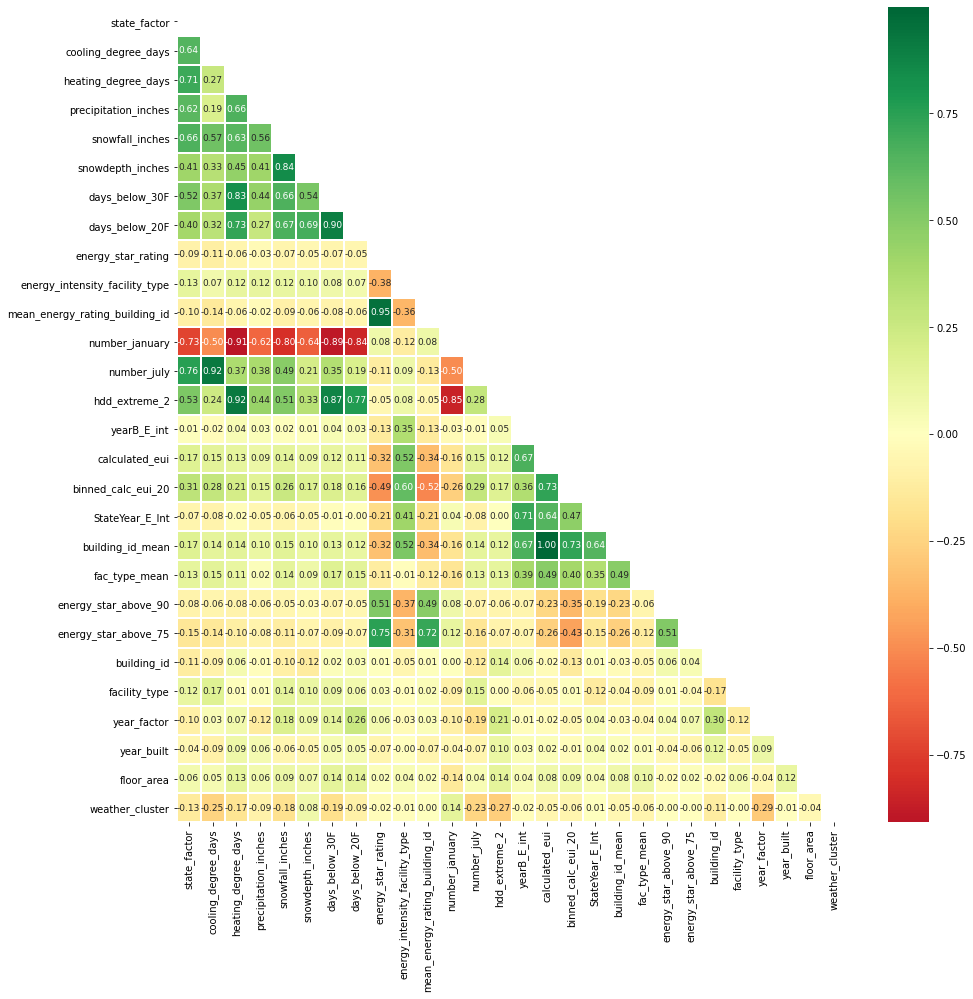

In [0]:
# Create the correlation matrix
corr_mean = set2.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f" , annot_kws={"size": 9})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [0]:
set2 = set2.drop([ 'cooling_degree_days'],axis=1)

In [0]:
vif_2 =calc_vif(set2)
features_2 = vif_2.sort_values('VIF', ascending = False)
features_2

Out[272]:

,variables,VIF
1,precipitation_inches,26.994378
4,energy_intensity_facility_type,17.963838
0,state_factor,16.458017
5,mean_energy_rating_building_id,13.497534
10,year_factor,10.182287
9,facility_type,5.753542
3,days_below_20F,5.571439
6,calculated_eui,4.622796
2,snowdepth_inches,4.220392
7,energy_star_above_75,3.319028


In [0]:
encoded_test2 = encoded_test.copy()

#set X_train
X = encoded_train[['precipitation_inches', 'energy_intensity_facility_type' , 'state_factor', 'mean_energy_rating_building_id', 'year_factor', 'facility_type', 'days_below_20F', 'calculated_eui',
                  'snowdepth_inches', 'energy_star_above_75' , 'weather_cluster', 'floor_area']]

#set X_test
encoded_test2 = encoded_test[['precipitation_inches', 'energy_intensity_facility_type' , 'state_factor', 'mean_energy_rating_building_id', 'year_factor', 'facility_type', 'days_below_20F', 'calculated_eui',
                  'snowdepth_inches', 'energy_star_above_75' , 'weather_cluster', 'floor_area']]
#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test2)

#create df
encoded_test2['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test2['id'] = encoded_test2['id'] =id_list
encoded_test2= encoded_test2[['id', 'site_eui']]
encoded_test2.head()

<command-3253243718953587>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test2['site_eui'] = predictions
<command-3253243718953587>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test2['id'] = encoded_test2['id'] =id_list
Out[277]:

,id,site_eui
75757,75757,149.035595
75758,75758,274.334022
75759,75759,151.169923
75760,75760,264.355841
75761,75761,239.768671


In [0]:
#safe as spark df - 2A
spark_df = spark.createDataFrame(encoded_test2)
spark_df.display()

id,site_eui
75757,149.03559453709994
75758,274.3340221250003
75759,151.16992332800007
75760,264.3558408659997
75761,239.7686710920003
75762,245.84773365200013
75763,226.5545443650002
75764,255.60437896800002
75765,156.04921382299992
75766,304.84908107399986


**2b**

In [0]:
encoded_test2b = encoded_test.copy()

#set X_train
X = encoded_train[['precipitation_inches', 'energy_intensity_facility_type' , 'state_factor', 'mean_energy_rating_building_id', 'year_factor', 'facility_type', 'days_below_20F', 'calculated_eui', 'calc_eui_perc_off',
                  'snowdepth_inches', 'energy_star_above_75' , 'weather_cluster', 'floor_area']]

#set X_test
encoded_test2b = encoded_test[['precipitation_inches', 'energy_intensity_facility_type' , 'state_factor', 'mean_energy_rating_building_id', 'year_factor', 'facility_type', 'days_below_20F', 'calculated_eui', 'calc_eui_perc_off',
                  'snowdepth_inches', 'energy_star_above_75' , 'weather_cluster', 'floor_area']]
#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test2b)

#create df
encoded_test2b['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test2b['id'] = encoded_test2b['id'] =id_list
encoded_test2b= encoded_test2b[['id', 'site_eui']] 
encoded_test2b.head()

<command-3253243718953595>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test2b['site_eui'] = predictions
<command-3253243718953595>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test2b['id'] = encoded_test2b['id'] =id_list
Out[56]:

,id,site_eui
75757,75757,141.357777
75758,75758,280.714132
75759,75759,149.235228
75760,75760,267.321585
75761,75761,243.187851


In [0]:
#safe as spark df - 2B
spark_df = spark.createDataFrame(encoded_test2b)
spark_df.display()

id,site_eui
75757,141.35777686400007
75758,280.71413150900014
75759,149.2352282089999
75760,267.32158507699984
75761,243.1878514740001
75762,259.44269787
75763,240.01206406300008
75764,254.37791406899993
75765,153.69242622400006
75766,288.32260839900033


### 1.3 - Uitstoot

In [0]:
set3 = train_short.copy()
set3 = set3.drop(['building_id_mean',
                  'calculated_eui',
                  'energy_intensity_floor_area',
                  'energy_intensity_built_year']
                 , axis=1)

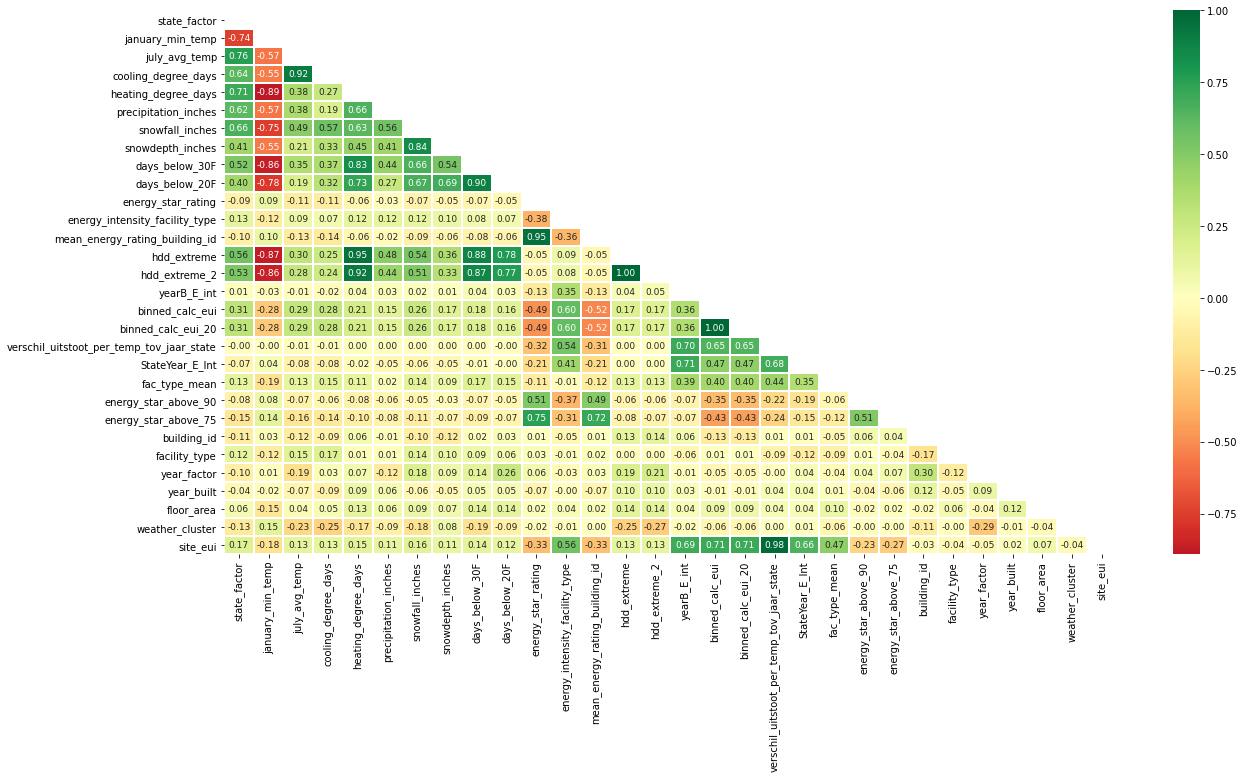

In [0]:
# Create the correlation matrix
corr_mean = set3.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f" , annot_kws={"size": 9})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [0]:
set3 = set3.drop(['floor_area'],axis=1)

In [0]:
vif_3 =calc_vif(set3)
features_3 = vif_3.sort_values('VIF', ascending = False)
features_3

Out[336]:

,variables,VIF
5,StateYear_E_Int,48.936153
1,days_below_30F,13.267166
6,fac_type_mean,12.974633
3,binned_calc_eui,10.782089
2,energy_star_rating,9.510545
0,january_min_temp,8.478687
8,building_id,2.820726
4,verschil_uitstoot_per_temp_tov_jaar_state,1.726475
7,energy_star_above_90,1.604670


In [0]:
encoded_test3 = encoded_test.copy()

#set X_train
X = encoded_train[['StateYear_E_Int', 'days_below_30F',  'fac_type_mean', 'binned_calc_eui', 'energy_star_rating',
                  'january_min_temp', 'building_id', 'verschil_uitstoot_per_temp_tov_jaar_state', 'energy_star_above_90']]

#set X_test
encoded_test3 = encoded_test[['StateYear_E_Int', 'days_below_30F',  'fac_type_mean', 'binned_calc_eui',
                              'energy_star_rating', 'january_min_temp', 'building_id', 'verschil_uitstoot_per_temp_tov_jaar_state', 'energy_star_above_90']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test3)

#create df
encoded_test3['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test3['id'] = encoded_test3['id'] =id_list
encoded_test3= encoded_test3[['id', 'site_eui']]
encoded_test3.head()

<command-3253243718953604>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test3['site_eui'] = predictions
<command-3253243718953604>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test3['id'] = encoded_test3['id'] =id_list
Out[337]:

,id,site_eui
75757,75757,168.685290
75758,75758,275.435026
75759,75759,152.138486
75760,75760,264.609328
75761,75761,243.249755


In [0]:
#safe as spark df - 3A
spark_df = spark.createDataFrame(encoded_test3)
spark_df.display()

id,site_eui
75757,168.68528967300009
75758,275.4350258860001
75759,152.13848637700016
75760,264.6093280949996
75761,243.24975533900042
75762,261.2862665
75763,229.15515315100026
75764,264.3768240269999
75765,158.13382409599973
75766,340.15089551299985


**3B**

In [0]:
encoded_test3b = encoded_test.copy()

#set X_train
X = encoded_train[['StateYear_E_Int', 'days_below_30F',  'fac_type_mean', 'binned_calc_eui', 'energy_star_rating',
                  'january_min_temp', 'building_id', 'verschil_uitstoot_per_temp_tov_jaar_state', 'energy_star_above_90', 'floor_area']]

#set X_test
encoded_test3b = encoded_test[['StateYear_E_Int', 'days_below_30F',  'fac_type_mean', 'binned_calc_eui',
                              'energy_star_rating', 'january_min_temp', 'building_id', 'verschil_uitstoot_per_temp_tov_jaar_state', 'energy_star_above_90', 'floor_area']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test3b)

#create df
encoded_test3b['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test3b['id'] = encoded_test3b['id'] =id_list
encoded_test3b= encoded_test3b[['id', 'site_eui']]
encoded_test3b.head()

<command-3253243718953607>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test3b['site_eui'] = predictions
<command-3253243718953607>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test3b['id'] = encoded_test3b['id'] =id_list
Out[340]:

,id,site_eui
75757,75757,168.872575
75758,75758,275.341905
75759,75759,152.174722
75760,75760,264.582690
75761,75761,243.081473


In [0]:
#safe as spark df - 3b
spark_df = spark.createDataFrame(encoded_test3b)
spark_df.display()

id,site_eui
75757,168.87257451300005
75758,275.34190469200007
75759,152.17472219500013
75760,264.58269014799964
75761,243.0814726950004
75762,261.392792692
75763,229.00467034600027
75764,265.2024901049999
75765,158.09314310199986
75766,338.85904631199986


**3C**

In [0]:
encoded_test3c = encoded_test.copy()

#set X_train
X = encoded_train[['StateYear_E_Int', 'days_below_30F',  'fac_type_mean', 'binned_calc_eui', 'energy_star_rating',
                  'january_min_temp', 'building_id', 'verschil_uitstoot_per_temp_tov_jaar_state', 'energy_star_above_90', 'floor_area', 'energy_intensity_facility_type']]

#set X_test
encoded_test3c = encoded_test[['StateYear_E_Int', 'days_below_30F',  'fac_type_mean', 'binned_calc_eui',
                              'energy_star_rating', 'january_min_temp', 'building_id', 'verschil_uitstoot_per_temp_tov_jaar_state', 'energy_star_above_90', 'floor_area' ,'energy_intensity_facility_type']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test3c)

#create df
encoded_test3c['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test3c['id'] = encoded_test3c['id'] =id_list
encoded_test3c= encoded_test3c[['id', 'site_eui']]
encoded_test3c.head()

<command-3253243718953609>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test3c['site_eui'] = predictions
<command-3253243718953609>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test3c['id'] = encoded_test3c['id'] =id_list
Out[349]:

,id,site_eui
75757,75757,168.773331
75758,75758,275.201850
75759,75759,152.193992
75760,75760,264.570784
75761,75761,243.232181


In [0]:
#safe as spark df - 3c
spark_df = spark.createDataFrame(encoded_test3c)
spark_df.display()

id,site_eui
75757,168.77333101300007
75758,275.20185014500015
75759,152.19399237100018
75760,264.5707843549996
75761,243.23218129600042
75762,261.475474375
75763,228.67395303200024
75764,265.04516498599986
75765,158.08430425699987
75766,338.67852043399995


In [0]:
temp = train_short[['StateYear_E_Int', 'days_below_30F',  'fac_type_mean', 'binned_calc_eui', 'energy_star_rating',
                  'january_min_temp', 'building_id', 'verschil_uitstoot_per_temp_tov_jaar_state', 'energy_star_above_90', 'floor_area', 'energy_intensity_facility_type']]

vif_3 =calc_vif(temp)
features_3 = vif_3.sort_values('VIF', ascending = False)
features_3

Out[352]:

,variables,VIF
0,StateYear_E_Int,59.599213
10,energy_intensity_facility_type,27.450931
2,fac_type_mean,14.882426
3,binned_calc_eui,14.102096
1,days_below_30F,13.935209
4,energy_star_rating,9.694635
5,january_min_temp,8.821468
6,building_id,2.828129
7,verschil_uitstoot_per_temp_tov_jaar_state,1.730180
8,energy_star_above_90,1.653121


### 1.4 Energy Intenstiy Floor Area

In [0]:
set4 = train_short.copy()
set4 = set4.drop(['building_id_mean',
                  'calculated_eui',
                  'verschil_uitstoot_per_temp_tov_jaar_state',
                  'energy_intensity_built_year']
                 , axis=1)

In [0]:
set4 = set4.drop(['days_below_20F' ],axis=1)

In [0]:
vif_4 =calc_vif(set4)
features_4 = vif_4.sort_values('VIF', ascending = False)
features_4

Out[427]:

,variables,VIF
4,energy_intensity_floor_area,28.608092
0,state_factor,20.357343
1,cooling_degree_days,18.792998
6,binned_calc_eui_20,14.286181
10,year_factor,10.230071
2,snowfall_inches,9.671538
5,mean_energy_rating_building_id,9.540350
3,days_below_30F,7.858975
9,facility_type,5.883677
8,building_id,3.175394


In [0]:
encoded_test4 = encoded_test.copy()

#set X_train
X = encoded_train[['energy_intensity_floor_area', 'state_factor' , 'cooling_degree_days', 'binned_calc_eui_20', 'year_factor',
                  'snowfall_inches', 'mean_energy_rating_building_id', 'days_below_30F', 'facility_type', 'building_id',
                  'weather_cluster', 'energy_star_above_90', 'floor_area']]

#set X_test
encoded_test4 = encoded_test[['energy_intensity_floor_area', 'state_factor' , 'cooling_degree_days', 'binned_calc_eui_20','year_factor', 'snowfall_inches', 'mean_energy_rating_building_id', 'days_below_30F', 'facility_type', 'building_id', 'weather_cluster', 'energy_star_above_90', 'floor_area']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test4)

#create df
encoded_test4['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test4['id'] = encoded_test4['id'] =id_list
encoded_test4= encoded_test4[['id', 'site_eui']]
encoded_test4.head()

<command-3253243718953620>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4['site_eui'] = predictions
<command-3253243718953620>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4['id'] = encoded_test4['id'] =id_list
Out[428]:

,id,site_eui
75757,75757,201.714435
75758,75758,283.393984
75759,75759,149.495253
75760,75760,265.032799
75761,75761,259.249742


In [0]:
#safe as spark df - 4A
spark_df = spark.createDataFrame(encoded_test4)
spark_df.display()

id,site_eui
75757,201.71443452000003
75758,283.39398369699984
75759,149.49525310700017
75760,265.0327992959996
75761,259.2497415870002
75762,262.4314386850001
75763,242.6071786060003
75764,267.391786827
75765,216.3416474299997
75766,311.3112103769997


**4B**

In [0]:
encoded_test4b = encoded_test.copy()

#set X_train
X = encoded_train[['energy_intensity_floor_area', 'state_factor' , 'cooling_degree_days', 'binned_calc_eui', 'year_factor',
                  'snowfall_inches', 'days_below_30F', 'facility_type', 'building_id',
                  'weather_cluster', 'energy_star_above_90', 'floor_area', 'energy_intensity_facility_type']]

#set X_test
encoded_test4b = encoded_test[['energy_intensity_floor_area', 'state_factor' , 'cooling_degree_days', 'binned_calc_eui',
                               'year_factor', 'snowfall_inches', 'days_below_30F', 'facility_type', 'building_id',
                               'weather_cluster', 'energy_star_above_90', 'floor_area', 'energy_intensity_facility_type']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test4b)

#create df
encoded_test4b['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test4b['id'] = encoded_test4b['id'] =id_list
encoded_test4b= encoded_test4b[['id', 'site_eui']]
encoded_test4b.head()

<command-248670011093252>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4b['site_eui'] = predictions
<command-248670011093252>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4b['id'] = encoded_test4b['id'] =id_list
Out[431]:

,id,site_eui
75757,75757,166.260275
75758,75758,280.089480
75759,75759,149.018782
75760,75760,261.580705
75761,75761,253.536744


In [0]:
#safe as spark df - 4B
spark_df = spark.createDataFrame(encoded_test4b)
spark_df.display()

id,site_eui
75757,166.26027468100017
75758,280.089480178
75759,149.01878184400016
75760,261.5807048699997
75761,253.5367442270002
75762,261.3106265760001
75763,240.02023243400023
75764,271.69107695899993
75765,162.5917408139998
75766,299.83655120599974


**4C**

In [0]:
encoded_test4c = encoded_test.copy()

#set X_train
X = encoded_train[['building_id', 'year_factor', 'state_factor', 'building_class', 'facility_type', 'floor_area', 'year_built',
                   'cooling_degree_days', 'energy_intensity_floor_area', 'energy_intensity_facility_type', 'energy_star_above_90', 'snowfall_inches']]

#set X_test
encoded_test4c = encoded_test[['building_id', 'year_factor', 'state_factor', 'building_class', 'facility_type', 'floor_area',
                               'year_built', 'cooling_degree_days', 'energy_intensity_floor_area', 'energy_intensity_facility_type', 'energy_star_above_90', 'snowfall_inches']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test4c)

#create df
encoded_test4c['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test4c['id'] = encoded_test4c['id'] =id_list
encoded_test4c= encoded_test4c[['id', 'site_eui']]
encoded_test4c.head()

<command-248670011093255>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4c['site_eui'] = predictions
<command-248670011093255>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4c['id'] = encoded_test4c['id'] =id_list
Out[436]:

,id,site_eui
75757,75757,168.161267
75758,75758,284.557462
75759,75759,150.137657
75760,75760,260.808234
75761,75761,246.960623


In [0]:
#safe as spark df - 4C
spark_df = spark.createDataFrame(encoded_test4c)
spark_df.display()

id,site_eui
75757,168.1612674040001
75758,284.5574619220001
75759,150.13765680400022
75760,260.8082338099997
75761,246.9606231850004
75762,256.52491065900006
75763,237.69871774800026
75764,272.75398471899996
75765,161.85089040799977
75766,303.96096738299974


In [0]:
temp = train_short[['building_id', 'year_factor', 'state_factor',  'facility_type', 'floor_area', 'year_built',
                   'cooling_degree_days', 'energy_intensity_floor_area', 'energy_intensity_facility_type', 'energy_star_above_90', 'snowfall_inches']]

vif_4 =calc_vif(temp)
features_4 = vif_4.sort_values('VIF', ascending = False)
features_4

Out[435]:

,variables,VIF
5,year_built,50.002450
8,energy_intensity_facility_type,25.848888
7,energy_intensity_floor_area,25.444285
2,state_factor,20.319703
6,cooling_degree_days,19.126862
1,year_factor,12.708928
10,snowfall_inches,8.099243
3,facility_type,6.411988
0,building_id,3.201765
4,floor_area,1.476540


**4D**

In [0]:
encoded_test4d = encoded_test.copy()

#set X_train
X = encoded_train[['building_id', 'year_factor', 'state_factor', 'building_class', 'facility_type', 'floor_area', 
                   'cooling_degree_days', 'energy_intensity_floor_area', 'energy_intensity_facility_type', 'energy_star_above_90', 'snowfall_inches' , 'fac_type_mean']]

#set X_test
encoded_test4d = encoded_test[['building_id', 'year_factor', 'state_factor', 'building_class', 'facility_type', 'floor_area',
                                'cooling_degree_days', 'energy_intensity_floor_area', 'energy_intensity_facility_type', 'energy_star_above_90', 'snowfall_inches', 'fac_type_mean']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test4d)

#create df
encoded_test4d['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test4d['id'] = encoded_test4d['id'] =id_list
encoded_test4d= encoded_test4d[['id', 'site_eui']]
encoded_test4d.head()

<command-248670011093260>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4d['site_eui'] = predictions
<command-248670011093260>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4d['id'] = encoded_test4d['id'] =id_list
Out[13]:

,id,site_eui
75757,75757,165.916626
75758,75758,278.227354
75759,75759,149.926292
75760,75760,261.219914
75761,75761,247.089085


In [0]:
#safe as spark df - 4D
spark_df = spark.createDataFrame(encoded_test4d)
spark_df.display()

id,site_eui
75757,165.91662641800008
75758,278.22735414799996
75759,149.9262920090002
75760,261.21991420299963
75761,247.0890851050004
75762,258.8810485610001
75763,239.72513123400026
75764,272.19022846699994
75765,162.73740950299984
75766,300.5452208539998


**4E**

In [0]:
encoded_test4e = encoded_test.copy()

#set X_train
X = encoded_train[['building_id', 'year_factor', 'state_factor', 'building_class', 'facility_type', 'floor_area', 'building_class',  'cooling_degree_days', 'energy_intensity_floor_area', 'energy_intensity_facility_type']]

#set X_test
encoded_test4e = encoded_test[['building_id', 'year_factor', 'state_factor', 'building_class', 'facility_type', 'floor_area', 'building_class',  'cooling_degree_days', 'energy_intensity_floor_area', 'energy_intensity_facility_type']]

#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test4e)

#create df
encoded_test4e['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test4e['id'] = encoded_test4e['id'] =id_list
encoded_test4e= encoded_test4e[['id', 'site_eui']]
encoded_test4e.head()

<command-2430503243931452>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4e['site_eui'] = predictions
<command-2430503243931452>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test4e['id'] = encoded_test4e['id'] =id_list
Out[59]:

,id,site_eui
75757,75757,165.364160
75758,75758,284.131997
75759,75759,149.039008
75760,75760,261.723371
75761,75761,249.090421


In [0]:
#safe as spark df - 4E
spark_df = spark.createDataFrame(encoded_test4e)
spark_df.display()

id,site_eui
75757,165.3641598300001
75758,284.13199679800005
75759,149.03900807900018
75760,261.7233712389997
75761,249.09042052500038
75762,258.4878448860001
75763,240.1421250430002
75764,272.05515861699985
75765,161.9747052139998
75766,305.25933717199973


### 1.5 Energy intensity built year

In [0]:
set5 = train_short.copy()
set5 = set5.drop(['building_id_mean',
                  'calculated_eui',
                  'verschil_uitstoot_per_temp_tov_jaar_state',
                  'energy_intensity_facility_type']
                 , axis=1)

In [0]:
set5 = set5.drop(['snowfall_inches'], axis=1)

In [0]:
vif_5 =calc_vif(set5)
features_5 = vif_5.sort_values('VIF', ascending = False)
features_5

Out[45]:

,variables,VIF
3,energy_intensity_built_year,33.109858
2,precipitation_inches,23.857193
0,state_factor,22.265279
4,binned_calc_eui,12.598571
5,fac_type_mean,12.413035
10,year_factor,9.782061
9,facility_type,5.815197
1,january_min_temp,3.677254
12,weather_cluster,3.243199
8,building_id,3.173189


In [0]:
encoded_test5 = encoded_test.copy()

#set X_train
X = encoded_train[['energy_intensity_built_year', 'precipitation_inches', 'state_factor' , 'binned_calc_eui' , 'fac_type_mean' , 'year_factor',
                  'facility_type', 'january_min_temp', 'weather_cluster', 'building_id', 'building_class', 'energy_star_above_75', 'energy_star_above_90','floor_area']]

#set X_test
encoded_test5 = encoded_test[['energy_intensity_built_year', 'precipitation_inches', 'state_factor' , 'binned_calc_eui' , 'fac_type_mean' ,
                              'year_factor','facility_type', 'january_min_temp', 'weather_cluster', 'building_id', 'building_class',
                              'energy_star_above_75', 'energy_star_above_90','floor_area']]
#set y_train
y=encoded_train['site_eui']

#fit and predicht
model=RandomForestRegressor(random_state=42)
model.fit(X, y)
predictions = model.predict(encoded_test5)

#create df
encoded_test5['site_eui'] = predictions
id_list = old_test['id'].tolist()
encoded_test5['id'] = encoded_test5['id'] =id_list
encoded_test5= encoded_test5[['id', 'site_eui']]
encoded_test5.head()

<command-2430503243931458>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test5['site_eui'] = predictions
<command-2430503243931458>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 encoded_test5['id'] = encoded_test5['id'] =id_list
Out[49]:

,id,site_eui
75757,75757,155.449218
75758,75758,274.040900
75759,75759,150.582907
75760,75760,261.346489
75761,75761,258.290627


In [0]:
#safe as spark df - 5
spark_df = spark.createDataFrame(encoded_test5)
spark_df.display()

id,site_eui
75757,155.44921811110015
75758,274.0408995370002
75759,150.58290743520018
75760,261.34648891699965
75761,258.2906274670001
75762,256.86937037300015
75763,246.0425033190003
75764,266.08425456
75765,153.03830366319988
75766,304.03409163099985


** 5B**

In [0]:
set5b = set5.drop(['precipitation_inches'], axis=1)

In [0]:
vif_5 =calc_vif(set5b)
features_5 = vif_5.sort_values('VIF', ascending = False)
features_5

Out[53]:

,variables,VIF
2,energy_intensity_built_year,31.799466
0,state_factor,14.493144
3,binned_calc_eui,12.474178
4,fac_type_mean,12.394878
9,year_factor,9.710368
8,facility_type,5.783726
1,january_min_temp,3.636729
11,weather_cluster,3.193065
7,building_id,3.082069
12,building_class,2.893962
